### Setup for data loading

In [12]:
import cv2
import h5py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F  # useful stateless functions

from matplotlib.pyplot import plot, xlabel, ylabel, title, imshow
from matplotlib import pyplot as plt

import numpy as np
import random

In [10]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

using device: cuda


### Loading human detection training data

In [2]:
# Load human detection training data.
# Each human sample is stored as lists of
# bbox[iClip][iFrame] = narray(N,D)
# where N = number of people in the frame, and 
# D = 4 (x, y, width, height)
hf = h5py.File('truth_data/ground_truth_data_train.mat', 'r')
data = hf.get('ground_truth_data')['list']
bbox = {}
for d in data[0]:
    imgname = ''.join([chr(x) for x in hf[d]['imgname'][:]])
    iClip = imgname[4:7]
    iFrame = imgname[8:12]
    if iClip not in bbox:
        bbox[iClip] = {}
    bbox[iClip][iFrame] = np.int_(hf[d]['bbox'][:].T/6)

In [3]:
# Check number of human dectection samples.
nData = 0
for iClip in bbox:
    for iFrame in bbox[iClip]:
        nData += bbox[iClip][iFrame].shape[0]
nData

1607

### Video data loading

In [4]:
# Save corresponding clips
path = 'videos/'
frames = {}
for iClip in bbox:
    videofile = path+'mv2_'+iClip+'.avi'
    cap = cv2.VideoCapture(videofile)
    frames[iClip] = {}
    for iFrame in bbox[iClip]:
        cap.set(1, int(iFrame))
        ret, frame = cap.read()
        if ret:
            frame = torch.from_numpy(frame)
            frames[iClip][iFrame] = frame


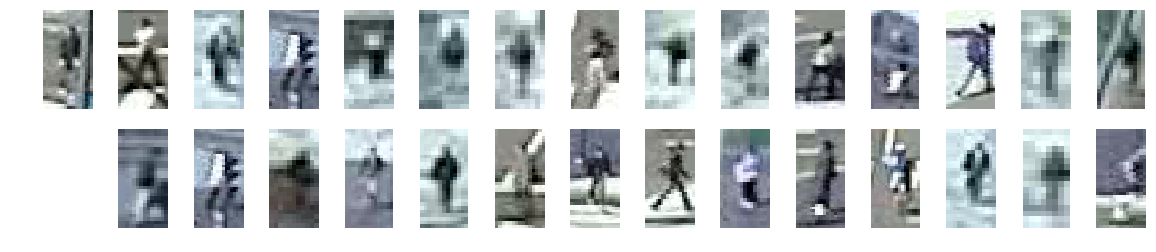

In [9]:
# Random sanity check
fig = plt.figure(figsize=(20,4))
for i in range(30):
    ax = fig.add_subplot(2,15,i+1)
    ax.axis('off')
    iClip = random.choice(list(bbox.keys()))
    iFrame = random.choice(list(bbox[iClip].keys()))
    try:
        x,y,w,h = bbox[iClip][iFrame][0]
        ax.imshow(frames[iClip][iFrame][y:y+h, x:x+w, :])
    except:
        continue

### Generating dataset

### Training data with still images
First, we try training the data with still images. Since the images of a person in the training data are not equal,

In [11]:


model = nn.Sequential(
    nn.Conv2d(3, 64, 5, padding=2),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 32, 5, padding=2),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 16, 3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    Flatten(),
    nn.Linear(16*))

1607

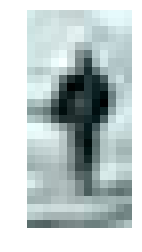

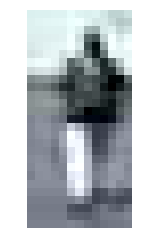

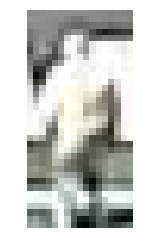

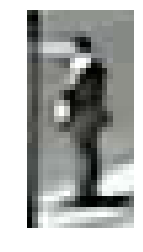

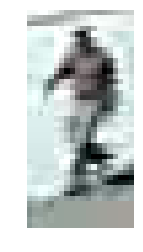

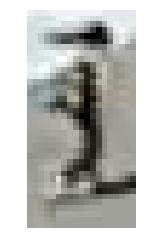

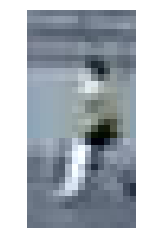

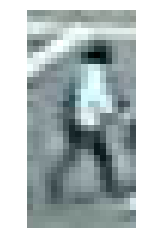

[[2071. 2131. 1219. 1537. 1606. 1891. 3460. 3835. 2041.]
 [ 970. 1171. 2140. 2056. 2281. 2302. 1513. 2113. 1426.]
 [  82.   82.  106.  124.  124.  115.  103.  109.  109.]
 [ 164.  164.  212.  248.  248.  230.  206.  218.  218.]]
mv2_001_0001.png


array([[2880.],
       [4320.]])

<HDF5 dataset "imgsize": shape (2, 1), type "<f8">
